# Plot Selected Examples for Excluded Evaluations

<hr/>

#### Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#### Constants

In [2]:
DATA_FOLDER = '../../../data/generated_by_notebooks/cumulative_performances/'
PLOT_FOLDER = './plots/example_exclusions/'

#### Settings

In [3]:
mpl.rcParams['figure.dpi'] = 200

#### Functions

In [4]:
def load_performances_file(name, algorithm, performance='predictive'):
    """Loads CSV file of cumulative performances."""
    path = f'{DATA_FOLDER}{performance}/{name}/{name}_{algorithm}.csv'
    table = pd.read_csv(path, sep=';').rename(columns={'Unnamed: 0': 'Descriptor'}).set_index('Descriptor')
    return table.T

<hr/>

#### Load data

In [5]:
# R^2
constant = load_performances_file('Q16602', 'svm_rbf')['CDDD']
bulge = load_performances_file('freesolv', 'xgb')['CDDD']
r2_decreases = load_performances_file('IL4', 'dropout')['MACCS']

r2_evaluations = [constant, bulge, r2_decreases]
r2_evaluations_labels = ['Q16602   SVM/CDDD', 'FreeSolv  XGB/CDDD', 'IL4           DNN/MACCS']

# \rho
rho_decreases = load_performances_file('P16581', 'shallow', performance='uncertainty')['MFC']
just_wiggling_around = load_performances_file('MMP2', 'xgb', performance='uncertainty')['MACCS']
too_noisy = load_performances_file('P16581', 'rf', performance='uncertainty')['RDKit']

rho_evaluations = [rho_decreases, just_wiggling_around, too_noisy]
rho_evaluations_labels = ['P16581  SNN/MFC', 'MMP2     XGB/MACCS', 'P16581  RF/RDKit']

#### Plot

Prepare plotting

In [6]:
predictive_range = [i for i in range(1, len(constant)+1)]
cumulative_range = [i for i in range(2, len(rho_decreases)+2)]

Actually plot

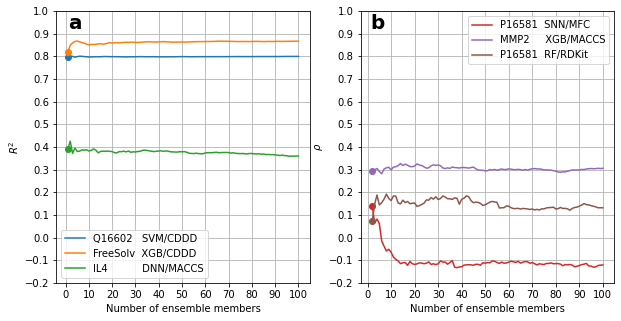

In [7]:
fig, (ax_pred, ax_uq) = plt.subplots(1, 2, figsize=(10, 5), frameon=False)

color_iterator = 0

for r2_evaluation, r2_evaluations_label in zip(r2_evaluations, r2_evaluations_labels):
    ax_pred.grid(zorder=1000)
    ax_pred.plot(predictive_range, r2_evaluation, label=r2_evaluations_label, zorder=100, color=f'C{color_iterator}')
    ax_pred.scatter([1], r2_evaluation[0], zorder=100, color=f'C{color_iterator}')
    ax_pred.set_ylim(-.2, 1.)
    ax_pred.legend()
    color_iterator += 1

#ax_pred.set_title('Predictive performance')
ax_pred.set_ylabel('$R^2$')
ax_pred.set_xlabel('Number of ensemble members')
ax_pred.set_yticks([-.2, -.1, 0., .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.])
ax_pred.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax_pred.text(1, 0.92, 'a', fontsize=20, weight='bold')
    
for rho_evaluation, rho_evaluations_label in zip(rho_evaluations, rho_evaluations_labels):
    ax_uq.grid(zorder=1000)
    ax_uq.plot(cumulative_range, rho_evaluation, label=rho_evaluations_label, zorder=100, color=f'C{color_iterator}')
    ax_uq.scatter([2], rho_evaluation[0], zorder=100, color=f'C{color_iterator}')
    ax_uq.set_ylim(-.2, 1.)
    ax_uq.legend()
    color_iterator += 1
    
#ax_uq.set_title('Uncertainty performance')
ax_uq.set_ylabel(r'$\rho$')
ax_uq.set_xlabel('Number of ensemble members')
ax_uq.set_yticks([-.2, -.1, 0., .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.])
ax_uq.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax_uq.text(1, 0.92, 'b', fontsize=20, weight='bold')

plt.savefig(f'{PLOT_FOLDER}excluded.pdf', bbox_inches='tight', pad_inches=0.1)

plt.show()